In [1]:
import pandas

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view
plt.rcParams['figure.figsize'] = [20,10]

attendance = pandas.read_csv('https://www3.cde.ca.gov/demo-downloads/attendance/chrabs1819.txt', sep= '\t',encoding='latin1')

In [4]:
attendance = pandas.read_csv('attendance_rates.csv')

In [5]:
attendance.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,AcademicYear,AggregateLevel,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
0,0,0,0,0,0,0,0,0,2018-19,C,...,NaN,Alameda,NaN,NaN,All,GF,114224,112861,16501,14.6
1,1,1,1,1,1,1,1,1,2018-19,C,...,NaN,Alameda,NaN,NaN,No,GF,102681,101285,15082,14.9
2,2,2,2,2,2,2,2,2,2018-19,C,...,NaN,Alameda,NaN,NaN,Yes,GF,12096,11850,1530,12.9
3,3,3,3,3,3,3,3,3,2018-19,C,...,NaN,Alameda,NaN,NaN,All,GM,121852,120048,18167,15.1
4,4,4,4,4,4,4,4,4,2018-19,C,...,NaN,Alameda,NaN,NaN,No,GM,110192,108370,16793,15.5


In [6]:
attendance.to_csv('attendance_rates.csv')

In [7]:
attendance_rates = pandas.read_csv('attendance_rates.csv')

In [8]:
sd_attendance = attendance_rates[attendance_rates.CountyName == 'San Diego']

In [9]:
sd_attendance.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,AcademicYear,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2018-19,...,NaN,San Diego,NaN,NaN,All,GF,255880,252379,26985,10.7
2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2018-19,...,NaN,San Diego,NaN,NaN,No,GF,215259,212116,22634,10.7
2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2018-19,...,NaN,San Diego,NaN,NaN,Yes,GF,45020,42801,5163,12.1
2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2018-19,...,NaN,San Diego,NaN,NaN,All,GM,270912,266732,29941,11.2
2423,2423,2423,2423,2423,2423,2423,2423,2423,2423,2018-19,...,NaN,San Diego,NaN,NaN,No,GM,230242,226343,25318,11.2


In [10]:
sb_attendance = attendance_rates[attendance_rates.CountyName == 'San Bernardino']

In [11]:
sb_attendance.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,AcademicYear,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
2348,2348,2348,2348,2348,2348,2348,2348,2348,2348,2018-19,...,NaN,San Bernardino,NaN,NaN,All,GF,208155,204226,26199,12.8
2349,2349,2349,2349,2349,2349,2349,2349,2349,2349,2018-19,...,NaN,San Bernardino,NaN,NaN,No,GF,192152,188589,24282,12.9
2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2018-19,...,NaN,San Bernardino,NaN,NaN,Yes,GF,19467,17278,2497,14.5
2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2018-19,...,NaN,San Bernardino,NaN,NaN,All,GM,219614,214646,29362,13.7
2352,2352,2352,2352,2352,2352,2352,2352,2352,2352,2018-19,...,NaN,San Bernardino,NaN,NaN,No,GM,204574,199974,27425,13.7


In [12]:
oc_attendance = attendance_rates[attendance_rates.CountyName == 'Orange']

In [13]:
oc_attendance.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,AcademicYear,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,2018-19,...,NaN,Orange,NaN,NaN,All,GF,239684,237376,20567,8.7
1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,2018-19,...,NaN,Orange,NaN,NaN,No,GF,228930,226708,18838,8.3
1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,2018-19,...,NaN,Orange,NaN,NaN,Yes,GF,11552,11114,1865,16.8
1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,2018-19,...,NaN,Orange,NaN,NaN,All,GM,254347,251401,22352,8.9
1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,2018-19,...,NaN,Orange,NaN,NaN,No,GM,244645,241778,20846,8.6


In [14]:
rivco_attendance = attendance_rates[attendance_rates.CountyName == 'Riverside']

In [15]:
rivco_attendance.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,AcademicYear,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
2136,2136,2136,2136,2136,2136,2136,2136,2136,2136,2018-19,...,NaN,Riverside,NaN,NaN,All,GF,218423,215116,26565,12.3
2137,2137,2137,2137,2137,2137,2137,2137,2137,2137,2018-19,...,NaN,Riverside,NaN,NaN,No,GF,206189,202820,25672,12.7
2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2018-19,...,NaN,Riverside,NaN,NaN,Yes,GF,13750,13237,1143,8.6
2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2018-19,...,NaN,Riverside,NaN,NaN,All,GM,230632,226719,28944,12.8
2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2018-19,...,NaN,Riverside,NaN,NaN,No,GM,218432,214523,28066,13.1


In [16]:
attendance_counties = pandas.concat([sd_attendance, rivco_attendance, sb_attendance, oc_attendance], axis = 0) 

In [17]:
type(attendance_counties)

pandas.core.frame.DataFrame

In [18]:
attendance_counties.shape

(54108, 23)

In [19]:
attendance_counties.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,AcademicYear,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2018-19,...,NaN,San Diego,NaN,NaN,All,GF,255880,252379,26985,10.7
2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2018-19,...,NaN,San Diego,NaN,NaN,No,GF,215259,212116,22634,10.7
2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2018-19,...,NaN,San Diego,NaN,NaN,Yes,GF,45020,42801,5163,12.1
2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2018-19,...,NaN,San Diego,NaN,NaN,All,GM,270912,266732,29941,11.2
2423,2423,2423,2423,2423,2423,2423,2423,2423,2423,2018-19,...,NaN,San Diego,NaN,NaN,No,GM,230242,226343,25318,11.2


In [20]:
df=attendance_counties
df[df.CharterYN=='No ']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,AcademicYear,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2018-19,...,NaN,San Diego,NaN,NaN,No,GF,215259,212116,22634,10.7
2423,2423,2423,2423,2423,2423,2423,2423,2423,2423,2018-19,...,NaN,San Diego,NaN,NaN,No,GM,230242,226343,25318,11.2
2426,2426,2426,2426,2426,2426,2426,2426,2426,2426,2018-19,...,NaN,San Diego,NaN,NaN,No,GR13,100477,99134,8956,9.0
2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2018-19,...,NaN,San Diego,NaN,NaN,No,GR46,99036,97626,8022,8.2
2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2018-19,...,NaN,San Diego,NaN,NaN,No,GR78,67796,66978,6374,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26853,26853,26853,26853,26853,26853,26853,26853,26853,26853,2018-19,...,0.0,Orange,Los Alamitos Unified,District Office,No,SE,300,295,10,3.4
26855,26855,26855,26855,26855,26855,26855,26855,26855,26855,2018-19,...,0.0,Orange,Los Alamitos Unified,District Office,No,SF,21,18,2,11.1
26857,26857,26857,26857,26857,26857,26857,26857,26857,26857,2018-19,...,0.0,Orange,Los Alamitos Unified,District Office,No,SH,25,22,0,0.0
26859,26859,26859,26859,26859,26859,26859,26859,26859,26859,2018-19,...,0.0,Orange,Los Alamitos Unified,District Office,No,SS,1776,1750,130,7.4


In [21]:
df.CharterYN.unique()


array(['All', 'No ', 'Yes'], dtype=object)

In [22]:
attendance_counties[attendance_counties.CharterYN=='No ']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,AcademicYear,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2018-19,...,NaN,San Diego,NaN,NaN,No,GF,215259,212116,22634,10.7
2423,2423,2423,2423,2423,2423,2423,2423,2423,2423,2018-19,...,NaN,San Diego,NaN,NaN,No,GM,230242,226343,25318,11.2
2426,2426,2426,2426,2426,2426,2426,2426,2426,2426,2018-19,...,NaN,San Diego,NaN,NaN,No,GR13,100477,99134,8956,9.0
2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2018-19,...,NaN,San Diego,NaN,NaN,No,GR46,99036,97626,8022,8.2
2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2018-19,...,NaN,San Diego,NaN,NaN,No,GR78,67796,66978,6374,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26853,26853,26853,26853,26853,26853,26853,26853,26853,26853,2018-19,...,0.0,Orange,Los Alamitos Unified,District Office,No,SE,300,295,10,3.4
26855,26855,26855,26855,26855,26855,26855,26855,26855,26855,2018-19,...,0.0,Orange,Los Alamitos Unified,District Office,No,SF,21,18,2,11.1
26857,26857,26857,26857,26857,26857,26857,26857,26857,26857,2018-19,...,0.0,Orange,Los Alamitos Unified,District Office,No,SH,25,22,0,0.0
26859,26859,26859,26859,26859,26859,26859,26859,26859,26859,2018-19,...,0.0,Orange,Los Alamitos Unified,District Office,No,SS,1776,1750,130,7.4


In [23]:
attendance_counties=attendance_counties[attendance_counties.CharterYN=='No ']

In [24]:
attendance_counties.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1.1',
       'AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment',
       'ChronicAbsenteeismEligibleCumulativeEnrollment',
       'ChronicAbsenteeismCount', 'ChronicAbsenteeismRate'],
      dtype='object')

In [25]:
attendance_counties.groupby(by='CountyName').sum()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,CountyCode,DistrictCode,SchoolCode
CountyName,,,,,,,,,,,,
Orange,16544369,16544369,16544369,16544369,16544369,16544369,16544369,16544369,16544369,19620,41297878.0,0.0
Riverside,16038571,16038571,16038571,16038571,16038571,16038571,16038571,16038571,16038571,19239,36374446.0,0.0
San Bernardino,23468642,23468642,23468642,23468642,23468642,23468642,23468642,23468642,23468642,27540,50018597.0,0.0
San Diego,31046957,31046957,31046957,31046957,31046957,31046957,31046957,31046957,31046957,34965,62339089.0,0.0


In [26]:
attendance_counties.dtypes

Unnamed: 0                                          int64
Unnamed: 0.1                                        int64
Unnamed: 0.1.1                                      int64
Unnamed: 0.1.1.1                                    int64
Unnamed: 0.1.1.1.1                                  int64
Unnamed: 0.1.1.1.1.1                                int64
Unnamed: 0.1.1.1.1.1.1                              int64
Unnamed: 0.1.1.1.1.1.1.1                            int64
Unnamed: 0.1.1.1.1.1.1.1.1                          int64
AcademicYear                                       object
AggregateLevel                                     object
CountyCode                                          int64
DistrictCode                                      float64
SchoolCode                                        float64
CountyName                                         object
DistrictName                                       object
SchoolName                                         object
CharterYN     

In [27]:
car=attendance_counties.ChronicAbsenteeismRate

In [28]:
(car=="*").sum()

204

car[car=="*"]="0".astype(float)

In [29]:
df.CumulativeEnrollment.unique()

array(['255880', '215259', '45020', ..., '1633', '3201', '1266'],
      dtype=object)

In [30]:
import numpy as np

In [31]:
df.replace("*",np.nan)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,AcademicYear,...,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,CumulativeEnrollment,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2018-19,...,NaN,San Diego,NaN,NaN,All,GF,255880,252379,26985,10.7
2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2018-19,...,NaN,San Diego,NaN,NaN,No,GF,215259,212116,22634,10.7
2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2018-19,...,NaN,San Diego,NaN,NaN,Yes,GF,45020,42801,5163,12.1
2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2018-19,...,NaN,San Diego,NaN,NaN,All,GM,270912,266732,29941,11.2
2423,2423,2423,2423,2423,2423,2423,2423,2423,2423,2018-19,...,NaN,San Diego,NaN,NaN,No,GM,230242,226343,25318,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148478,148478,148478,148478,148478,148478,148478,148478,148478,148478,2018-19,...,130765.0,Orange,SBE - Magnolia Science Academy Santa Ana,Magnolia Science Academy Santa Ana,All,SE,255,253,26,10.3
148479,148479,148479,148479,148479,148479,148479,148479,148479,148479,2018-19,...,130765.0,Orange,SBE - Magnolia Science Academy Santa Ana,Magnolia Science Academy Santa Ana,All,SF,NaN,NaN,NaN,NaN
148480,148480,148480,148480,148480,148480,148480,148480,148480,148480,2018-19,...,130765.0,Orange,SBE - Magnolia Science Academy Santa Ana,Magnolia Science Academy Santa Ana,All,SH,64,62,11,17.7
148481,148481,148481,148481,148481,148481,148481,148481,148481,148481,2018-19,...,130765.0,Orange,SBE - Magnolia Science Academy Santa Ana,Magnolia Science Academy Santa Ana,All,SS,614,606,64,10.6


In [32]:
attendance_counties=attendance_counties.replace("*",np.nan)

In [33]:
attendance_counties.ChronicAbsenteeismCount=attendance_counties.ChronicAbsenteeismCount.astype(float)

df.CumulativeEnrollment.astype(float)

In [34]:
df.CumulativeEnrollment.dtype

dtype('O')

In [35]:
attendance_counties.CumulativeEnrollment=attendance_counties.CumulativeEnrollment.astype(float)

In [36]:
attendance_counties.CumulativeEnrollment.head()

2420    215259.0
2423    230242.0
2426    100477.0
2429     99036.0
2432     67796.0
Name: CumulativeEnrollment, dtype: float64

In [37]:
attendance_counties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2947 entries, 2420 to 26861
Data columns (total 23 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      2947 non-null   int64  
 1   Unnamed: 0.1                                    2947 non-null   int64  
 2   Unnamed: 0.1.1                                  2947 non-null   int64  
 3   Unnamed: 0.1.1.1                                2947 non-null   int64  
 4   Unnamed: 0.1.1.1.1                              2947 non-null   int64  
 5   Unnamed: 0.1.1.1.1.1                            2947 non-null   int64  
 6   Unnamed: 0.1.1.1.1.1.1                          2947 non-null   int64  
 7   Unnamed: 0.1.1.1.1.1.1.1                        2947 non-null   int64  
 8   Unnamed: 0.1.1.1.1.1.1.1.1                      2947 non-null   int64  
 9   AcademicYear                         

In [38]:
attendance_counties[["CumulativeEnrollment","CountyName"]]

,CumulativeEnrollment,CountyName
2420,215259.0,San Diego
2423,230242.0,San Diego
2426,100477.0,San Diego
2429,99036.0,San Diego
2432,67796.0,San Diego
...,...,...
26853,300.0,Orange
26855,21.0,Orange
26857,25.0,Orange
26859,1776.0,Orange


In [39]:
attendance_counties[["CumulativeEnrollment","CountyName"]].groupby("CountyName").sum()

,CumulativeEnrollment
CountyName,
Orange,5351478.0
Riverside,4947331.0
San Bernardino,4707147.0
San Diego,5064892.0


In [40]:
county_summary=attendance_counties[["ChronicAbsenteeismCount","CumulativeEnrollment","CountyName"]].groupby("CountyName").sum()

In [41]:
county_summary.head()

,ChronicAbsenteeismCount,CumulativeEnrollment
CountyName,,
Orange,470658.0,5351478.0
Riverside,642050.0,4947331.0
San Bernardino,633064.0,4707147.0
San Diego,579235.0,5064892.0


In [42]:
county_summary["absentrate"]=county_summary.ChronicAbsenteeismCount/county_summary.CumulativeEnrollment

In [43]:
county_summary.head()

,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate
CountyName,,,
Orange,470658.0,5351478.0,0.087949
Riverside,642050.0,4947331.0,0.129777
San Bernardino,633064.0,4707147.0,0.134490
San Diego,579235.0,5064892.0,0.114363


In [44]:
grad=pandas.read_csv("graduation_rates.csv")

In [45]:
grad.head()

,Unnamed: 0,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,0,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,...,65,0.8,2,0.0,24,0.3,440,5.2,228,2.7
1,1,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,...,123,1.3,1,0.0,54,0.6,823,9.0,417,4.6
2,2,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,...,24,0.6,0,0.0,11,0.3,112,2.6,41,1.0
3,3,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,...,39,2.2,0,0.0,10,0.6,167,9.2,148,8.2
4,4,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,...,3,3.3,0,0.0,4,4.3,15,16.3,7,7.6


In [46]:
county_summary=county_summary.reset_index()

In [47]:
combined=county_summary.merge(grad,on="CountyName")

In [48]:
combined.head()

,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Unnamed: 0,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,Orange,470658.0,5351478.0,0.087949,4014,2019-20,C,30,NaN,NaN,...,147,0.7,4,0.0,80,0.4,824,4.2,344,1.8
1,Orange,470658.0,5351478.0,0.087949,4015,2019-20,C,30,NaN,NaN,...,263,1.3,21,0.1,155,0.8,1178,5.7,590,2.9
2,Orange,470658.0,5351478.0,0.087949,4016,2019-20,C,30,NaN,NaN,...,*,*,*,*,*,*,*,*,*,*
3,Orange,470658.0,5351478.0,0.087949,4017,2019-20,C,30,NaN,NaN,...,72,1.1,1,0.0,16,0.2,158,2.3,51,0.8
4,Orange,470658.0,5351478.0,0.087949,4018,2019-20,C,30,NaN,NaN,...,9,1.5,1,0.2,1,0.2,51,8.2,25,4.0


In [49]:
combined.columns

Index(['CountyName', 'ChronicAbsenteeismCount', 'CumulativeEnrollment',
       'absentrate', 'Unnamed: 0', 'AcademicYear', 'AggregateLevel',
       'CountyCode', 'DistrictCode', 'SchoolCode', 'DistrictName',
       'SchoolName', 'CharterSchool', 'DASS', 'ReportingCategory',
       'CohortStudents', 'Regular HS Diploma Graduates (Count)',
       'Regular HS Diploma Graduates (Rate)', 'Met UC/CSU Grad Req's (Count)',
       'Met UC/CSU Grad Req's (Rate)', 'Seal of Biliteracy (Count)',
       'Seal of Biliteracy (Rate)', 'Golden State Seal Merit Diploma (Count)',
       'Golden State Seal Merit Diploma (Rate', 'CHSPE Completer (Count)',
       'CHSPE Completer (Rate)', 'Adult Ed. HS Diploma (Count)',
       'Adult Ed. HS Diploma (Rate)', 'SPED Certificate (Count)',
       'SPED Certificate (Rate)', 'GED Completer (Count)',
       'GED Completer (Rate)', 'Other Transfer (Count)',
       'Other Transfer (Rate)', 'Dropout (Count)', 'Dropout (Rate)',
       'Still Enrolled (Count)', 'Still En

In [50]:
from geosnap import datasets

In [51]:
counties=datasets.counties()

In [52]:
counties.head()

,geoid,geometry
0,31039,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53069,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35011,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31109,"POLYGON ((-96.91060 40.95841, -96.91060 40.958..."
4,31129,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [53]:
fips=pandas.read_csv("https://raw.githubusercontent.com/kjhealy/us-county/master/data/census/fips-by-state.csv",converters={"fips":str},encoding="latin1")

In [54]:
fips.head()

,fips,name,state
0,01001,Autauga County,AL
1,01003,Baldwin County,AL
2,01005,Barbour County,AL
3,01007,Bibb County,AL
4,01009,Blount County,AL


In [55]:
counties=counties.merge(fips,left_on="geoid",right_on="fips")

In [56]:
counties.head()

,geoid,geometry,fips,name,state
0,31039,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31039,Cuming County,NE
1,53069,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",53069,Wahkiakum County,WA
2,35011,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",35011,De Baca County,NM
3,31109,"POLYGON ((-96.91060 40.95841, -96.91060 40.958...",31109,Lancaster County,NE
4,31129,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31129,Nuckolls County,NE


In [57]:
counties.name=counties.name.apply(lambda x:x[:-7])

In [58]:
counties.head()

,geoid,geometry,fips,name,state
0,31039,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31039,Cuming,NE
1,53069,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",53069,Wahkiakum,WA
2,35011,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",35011,De Baca,NM
3,31109,"POLYGON ((-96.91060 40.95841, -96.91060 40.958...",31109,Lancaster,NE
4,31129,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31129,Nuckolls,NE


In [59]:
counties=counties.merge(combined, left_on="name", right_on="CountyName",how="right")

In [60]:
counties=counties[counties.state=="CA"]

<AxesSubplot:>

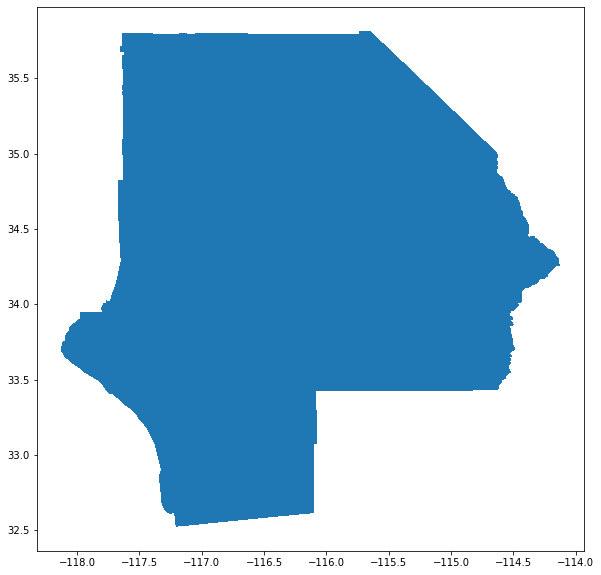

In [61]:
counties.plot() 

<AxesSubplot:>

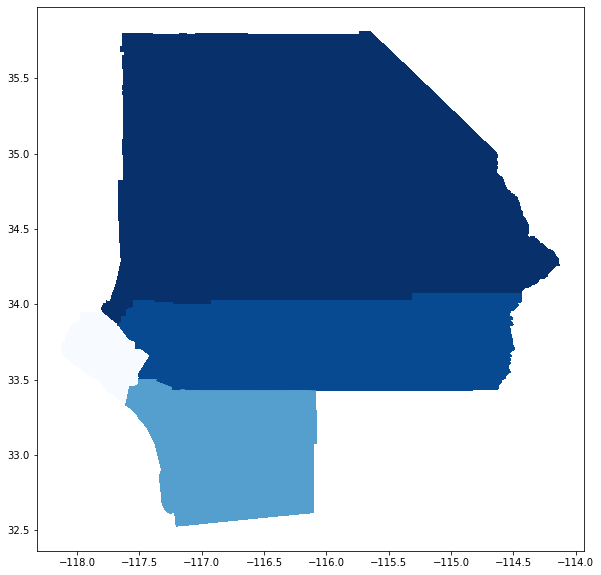

In [62]:
counties.plot("absentrate",cmap="Blues")

In [63]:
counties.columns

Index(['geoid', 'geometry', 'fips', 'name', 'state', 'CountyName',
       'ChronicAbsenteeismCount', 'CumulativeEnrollment', 'absentrate',
       'Unnamed: 0', 'AcademicYear', 'AggregateLevel', 'CountyCode',
       'DistrictCode', 'SchoolCode', 'DistrictName', 'SchoolName',
       'CharterSchool', 'DASS', 'ReportingCategory', 'CohortStudents',
       'Regular HS Diploma Graduates (Count)',
       'Regular HS Diploma Graduates (Rate)', 'Met UC/CSU Grad Req's (Count)',
       'Met UC/CSU Grad Req's (Rate)', 'Seal of Biliteracy (Count)',
       'Seal of Biliteracy (Rate)', 'Golden State Seal Merit Diploma (Count)',
       'Golden State Seal Merit Diploma (Rate', 'CHSPE Completer (Count)',
       'CHSPE Completer (Rate)', 'Adult Ed. HS Diploma (Count)',
       'Adult Ed. HS Diploma (Rate)', 'SPED Certificate (Count)',
       'SPED Certificate (Rate)', 'GED Completer (Count)',
       'GED Completer (Rate)', 'Other Transfer (Count)',
       'Other Transfer (Rate)', 'Dropout (Count)', 'Dropou

<AxesSubplot:>

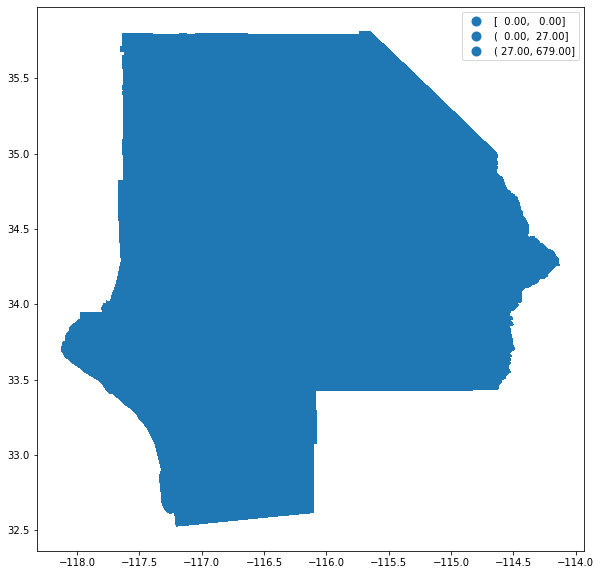

In [64]:
counties.plot(column='Dropout (Rate)', scheme ='Quantiles' , k=3,  legend=True)

In [ ]:
counties.plot(column= 'Regular HS Diploma Graduates (Rate)', cmap='Blues', scheme='Quantiles', k=3,edgecolor='grey',
        legend=True)

<AxesSubplot:>

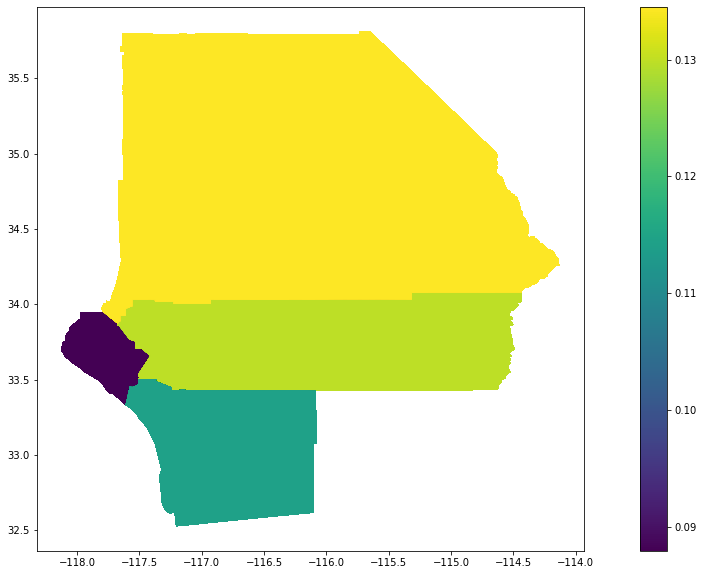

In [66]:
counties.plot(column='absentrate', legend=True)

<AxesSubplot:>

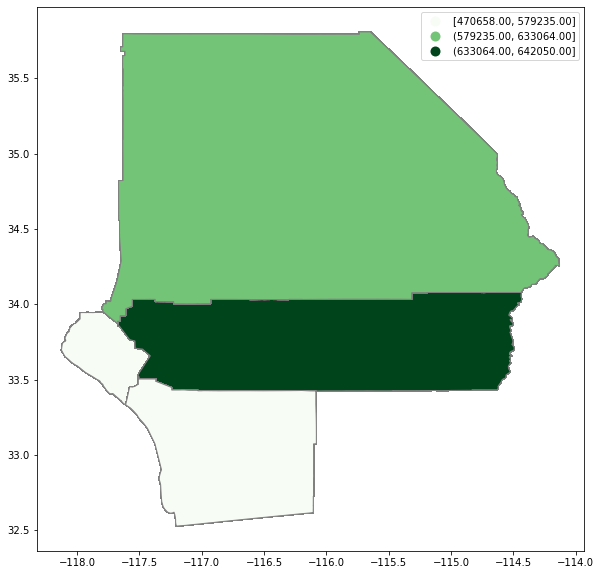

In [67]:
counties.plot(column='ChronicAbsenteeismCount', cmap='Greens', scheme='Quantiles', k=3,edgecolor='grey',
        legend=True)

In [68]:
counties.to_parquet("schoolcounties.parquet")

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [70]:
gpd.read_parquet("schoolcounties.parquet")

,geoid,geometry,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Unnamed: 0,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
6,06059,"POLYGON ((-117.98910 33.58579, -117.99067 33.5...",06059,Orange,CA,Orange,470658.0,5351478.0,0.087949,4014,...,147,0.7,4,0.0,80,0.4,824,4.2,344,1.8
14,06059,"POLYGON ((-117.98910 33.58579, -117.99067 33.5...",06059,Orange,CA,Orange,470658.0,5351478.0,0.087949,4015,...,263,1.3,21,0.1,155,0.8,1178,5.7,590,2.9
22,06059,"POLYGON ((-117.98910 33.58579, -117.99067 33.5...",06059,Orange,CA,Orange,470658.0,5351478.0,0.087949,4016,...,*,*,*,*,*,*,*,*,*,*
30,06059,"POLYGON ((-117.98910 33.58579, -117.99067 33.5...",06059,Orange,CA,Orange,470658.0,5351478.0,0.087949,4017,...,72,1.1,1,0.0,16,0.2,158,2.3,51,0.8
38,06059,"POLYGON ((-117.98910 33.58579, -117.99067 33.5...",06059,Orange,CA,Orange,470658.0,5351478.0,0.087949,4018,...,9,1.5,1,0.2,1,0.2,51,8.2,25,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130648,06073,"POLYGON ((-117.43743 33.17953, -117.44954 33.1...",06073,San Diego,CA,San Diego,579235.0,5064892.0,0.114363,207542,...,0,0.0,0,0.0,0,0.0,1,5.0,12,60.0
130649,06073,"POLYGON ((-117.43743 33.17953, -117.44954 33.1...",06073,San Diego,CA,San Diego,579235.0,5064892.0,0.114363,207543,...,0,0.0,0,0.0,0,0.0,1,5.6,9,50.0
130650,06073,"POLYGON ((-117.43743 33.17953, -117.44954 33.1...",06073,San Diego,CA,San Diego,579235.0,5064892.0,0.114363,207544,...,0,0.0,1,6.3,0,0.0,1,6.3,8,50.0
130651,06073,"POLYGON ((-117.43743 33.17953, -117.44954 33.1...",06073,San Diego,CA,San Diego,579235.0,5064892.0,0.114363,207545,...,0,0.0,4,4.8,1,1.2,5,6.0,29,34.9


In [ ]:
counties.head()